<a href="https://colab.research.google.com/github/inefable12/UNMSM_quimica_2023/blob/main/cinetica_termodinamica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>
<br>
<br>
<br>
<br>

<font size='6' style="color:#00A6D6">  <b>Cinética y Termodinámica</b> </font>
<a name="loading"></a>

<font size='4' style="color:#00A6D6">  <b>Jesus Alvarado-Huayhuaz

</b> </font>
<a name="loading"></a>

## [1] Instalación de librerías

In [ ]:
  %%capture
  !pip install rdkit
  !pip install pyscf

In [ ]:
# Importamos librerías
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
from pyscf import gto, scf

## [2] Estructuras

### Isómero CIS

In [9]:
# representación SMILES del isómero CIS
smi_cis = "F\C=C/C"
# elemento de RDKit
cis = Chem.MolFromSmiles(smi_cis)
# agregamos sus hidrógenos
cis = Chem.AddHs(cis)
# etiquetamos sus átomos y generamos sus coordenadas usando una semilla
Chem.AllChem.EmbedMolecule(cis, useRandomCoords=False,randomSeed=1234)
# guardamos a un archivo XYZ
Chem.MolToXYZFile(cis, "cis.xyz")

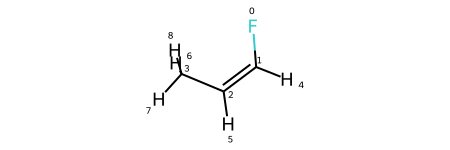

In [10]:
#visualizamos
cis

In [11]:
# visualizamos las coordenadas en el archivo XYZ
!cat initial_cis.xyz

9

F      1.224313    1.588683    0.229179
C      1.326372    0.255371   -0.008640
C      0.266800   -0.540877   -0.109760
C     -1.101281    0.029552    0.040326
H      2.326087   -0.140174   -0.114587
H      0.415309   -1.598572   -0.300884
H     -1.290803    0.390309    1.083251
H     -1.843790   -0.790909   -0.115870
H     -1.323007    0.806618   -0.703014


### Isómero TRANS

In [12]:
smi_trans = "F/C=C/C"
trans = Chem.MolFromSmiles(smi_trans)
trans = Chem.AddHs(trans)
Chem.AllChem.EmbedMolecule(trans, useRandomCoords=False,randomSeed=1234)
Chem.MolToXYZFile(trans, "trans.xyz")

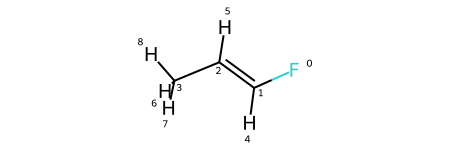

In [13]:
trans

In [14]:
!cat trans.xyz

9

F      2.548043    0.255798   -0.051804
C      1.310325   -0.297546    0.040056
C      0.243682    0.487148   -0.067889
C     -1.128832   -0.079367    0.026988
H      1.169516   -1.367331    0.199862
H      0.416502    1.563075   -0.228819
H     -1.412747   -0.391958    1.029624
H     -1.305683   -0.908523   -0.662271
H     -1.840807    0.738703   -0.285747


### Diedro = 90.0 º

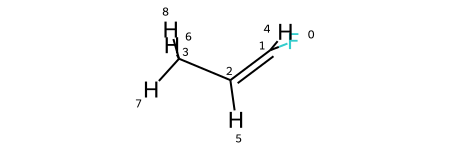

In [15]:
Chem.AllChem.SetDihedralDeg(cis.GetConformer(0),3,2,1,0,90.0)
Chem.MolToXYZFile(cis, "diedro90.xyz")
cis

In [16]:
!cat diedro90.xyz

9

F      1.953607    0.498569    1.171244
C      1.326372    0.255371   -0.008640
C      0.266800   -0.540877   -0.109760
C     -1.101281    0.029552    0.040326
H      1.732922    0.746460   -0.880798
H      0.415309   -1.598572   -0.300884
H     -1.290803    0.390309    1.083251
H     -1.843790   -0.790909   -0.115870
H     -1.323007    0.806618   -0.703014


## [3] Cálculo de energía

### CIS

In [17]:
cis = gto.M(atom="cis.xyz")

In [18]:
cis.basis = "6-31G"
mf_cis = cis.KS()
mf_cis.xc = 'b3lyp'

In [19]:
resultado_cis = mf_cis.kernel()
resultado_cis

converged SCF energy = -214.253613242031


-214.25361324203055

### Diedro 90

In [20]:
cis_90 = gto.M(atom="diedro90.xyz")

In [21]:
cis_90.basis = "6-31G"
mf_90 = cis_90.KS()
mf_90.xc = 'b3lyp'

In [22]:
resultado_cis_90 = mf_90.kernel()
resultado_cis_90

converged SCF energy = -214.089244975096


-214.08924497509634

### TRANS

In [23]:
trans = gto.M(atom="trans.xyz")

In [24]:
trans.basis = "6-31G"
mf_trans = trans.KS()
mf_trans.xc = 'b3lyp'

In [25]:
resultado_trans= mf_trans.kernel()
resultado_trans

converged SCF energy = -214.250988732768


-214.25098873276818

## 4. Gráfica

In [26]:
%%capture
!pip install git+https://github.com/giacomomarchioro/PyEnergyDiagrams

In [27]:
import matplotlib.pyplot as plt
from energydiagram import ED

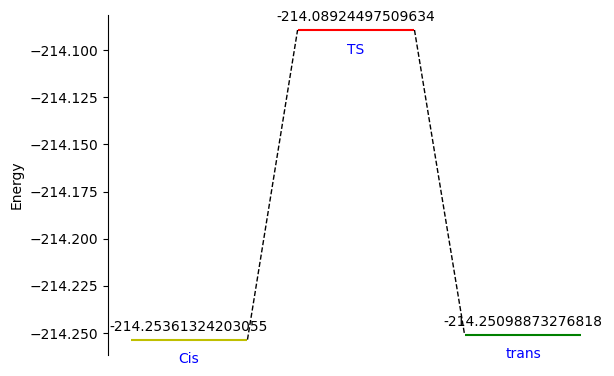

In [33]:
diagram = ED()
diagram.add_level(resultado_cis,'Cis',color='y')
diagram.add_level(resultado_cis_90,'TS',color='r')
diagram.add_level(resultado_trans,'trans',color='g')

diagram.add_link(0,1)
diagram.add_link(1,2)
diagram.plot(ylabel="Energy") # / $kcal$ $mol^{-1}$")

## Cinética:

In [34]:
E_activacion = resultado_cis_90 - resultado_cis
E_activacion

0.16436826693421835

## Termodinámica

In [29]:
entalpia = resultado_trans - resultado_cis
if entalpia>0:
  print("La reacción es endotérmica")
else:
    print("La reacción es exotérmica")

La reacción es endotérmica
